In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Neuron labs/data.csv', encoding='unicode_escape')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df['TotalAmt']= df['Quantity']* df['UnitPrice']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   TotalAmt     541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Country'] = label_encoder.fit_transform(df['Country'])

<ipython-input-9-f94f9259900d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<Axes: >

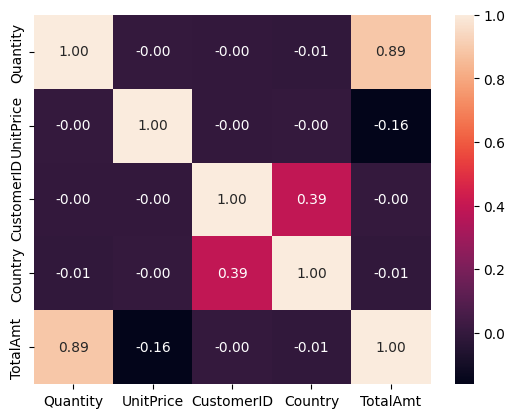

In [9]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [10]:
X=df.iloc[:, [6,8]]

In [15]:
X.dropna(inplace=True)

<ipython-input-15-32f8c2353909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [11]:
X

,CustomerID,TotalAmt
0,17850.0,15.30
1,17850.0,20.34
2,17850.0,22.00
3,17850.0,20.34
4,17850.0,20.34
...,...,...
541904,12680.0,10.20
541905,12680.0,12.60
541906,12680.0,16.60
541907,12680.0,16.60


In [27]:
X.describe()

,CustomerID,TotalAmt
count,406829.000000,406829.000000
mean,15287.690570,20.401854
std,1713.600303,427.591718
min,12346.000000,-168469.600000
25%,13953.000000,4.200000
50%,15152.000000,11.100000
75%,16791.000000,19.500000
max,18287.000000,168469.600000


In [16]:
from sklearn.cluster import KMeans
wcss= []
kmc= KMeans()
kmc.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [17]:
for i in range(1,11):
  kmeans= KMeans(n_clusters= i, init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

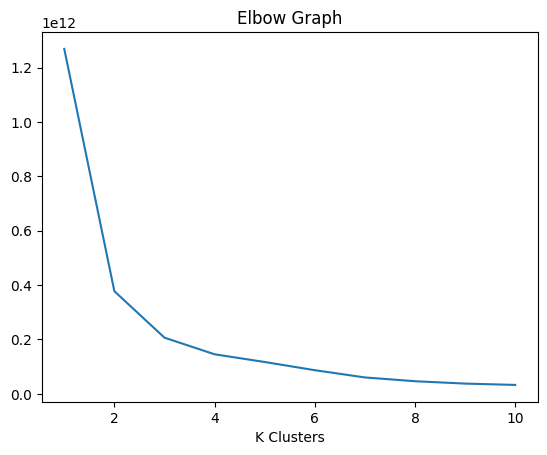

In [19]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Graph')
plt.xlabel('K Clusters')
#plt.ylabel('WCSS Values')
plt.show()

In [37]:
kmc= KMeans(n_clusters= 4, init= 'k-means++', random_state=0)
y_kmc= kmc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


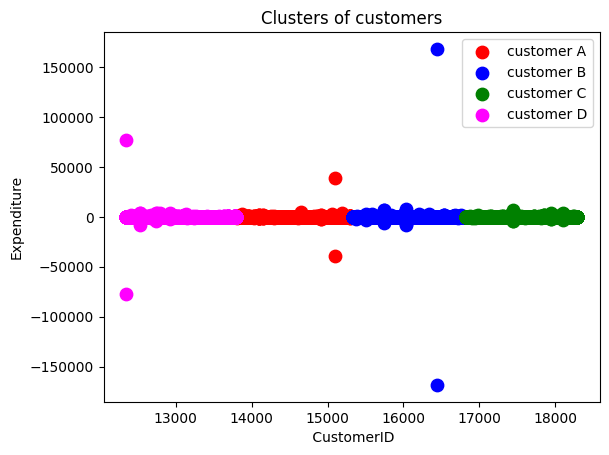

In [40]:
plt.scatter(X.iloc[y_kmc == 0,0], X.iloc[y_kmc == 0,1], s=80, c="red", label= 'customer A')
plt.scatter(X.iloc[y_kmc == 1,0], X.iloc[y_kmc == 1,1], s=80, c="blue", label= 'customer B')
plt.scatter(X.iloc[y_kmc == 2,0], X.iloc[y_kmc == 2,1], s=80, c="green", label= 'customer C')
plt.scatter(X.iloc[y_kmc == 3,0], X.iloc[y_kmc == 3,1], s=80, c="magenta", label= 'customer D')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='magenta', label= 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(' CustomerID')
plt.ylabel('Expenditure')
plt.legend()
plt.show()